In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_digits, load_iris, make_blobs
from sklearn.svm  import LinearSVC, SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTrees

In [47]:
RANDOM_STATE = 24
np.random.seed(RANDOM_STATE)

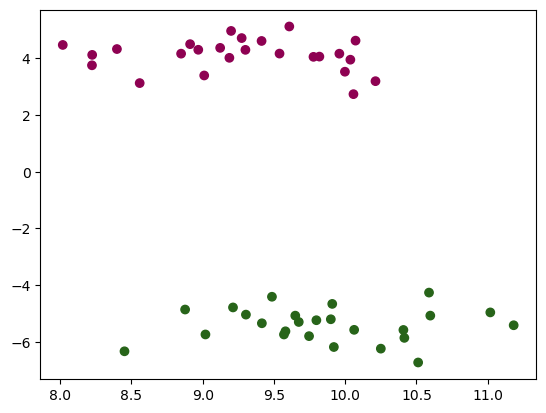

In [48]:
X, y = make_blobs(n_samples=50, centers=2, random_state=RANDOM_STATE, cluster_std=0.6)
plt.scatter(X[:,0], X[:,1], c = y ,cmap=plt.cm.PiYG)

In [49]:
clf = SVC(kernel='linear')
clf.fit(X,y)
y_pred = clf.predict(X)
accuracy_score(y,y_pred)

1.0

In [50]:
confusion_matrix(y,y_pred)

array([[25,  0],
       [ 0, 25]], dtype=int64)

C:\Users\user\AppData\Local\Temp\ipykernel_9116\725548085.py:12: UserWarning: The following kwargs were not used by contour: 'linestyle'
  plt.contour(XX,YY,preds,colors='k',levels=[-1,0,1], linestyle=['--','-','--'])


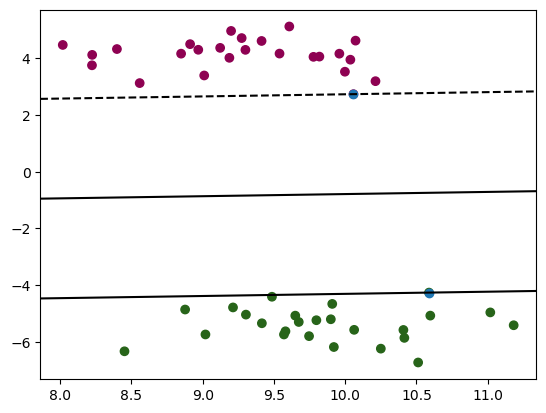

In [51]:
plt.scatter(X[:,0], X[:,1], c = y, cmap=plt.cm.PiYG)
xLim = np.linspace(plt.xlim()[0], plt.xlim()[1], 30)
yLim = np.linspace(plt.ylim()[0], plt.ylim()[1], 30)

YY, XX = np.meshgrid(yLim,xLim)
preds = np.zeros_like(XX)

for i, xi in enumerate(xLim):
    for j, yi in enumerate(yLim):
        preds[i,j] = clf.decision_function(np.array([xi,yi]).reshape(1,-1)).item()

plt.contour(XX,YY,preds,colors='k',levels=[-1,0,1], linestyle=['--','-','--'])
plt.scatter(clf.support_vectors_[:,0],clf.support_vectors_[:,1])

In [52]:
digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [53]:
TEST_SIZE = 0.2
X_train, X_test, Y_train, Y_test = train_test_split(digits.data,digits.target,stratify=digits.target,test_size=TEST_SIZE, random_state=RANDOM_STATE)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((1437, 64), (360, 64), (1437,), (360,))

SVC:kernel :linear  | F1 score: 0.9777
SVC:kernel :rbf     | F1 score: 0.9861
SVC:kernel :poly    | F1 score: 0.9916


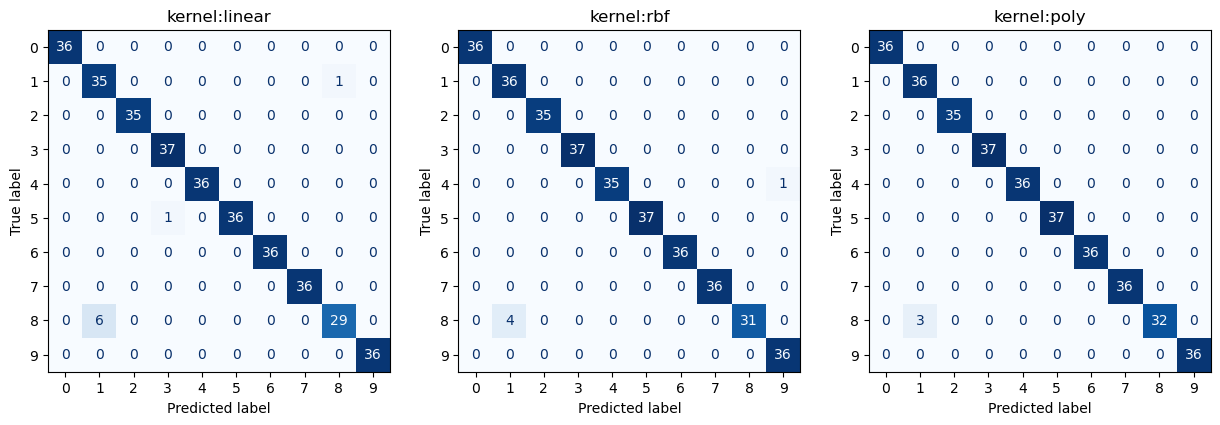

In [54]:
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay
fix,axes = plt.subplots(1,3,figsize=(15,8))
for i, knl in enumerate(['linear','rbf','poly']):
    clf = SVC(kernel=knl).fit(X_train,Y_train)
    y_pred = clf.predict(X_test)
    print(f'SVC:kernel :{knl: <7} | F1 score: {f1_score(Y_test,y_pred, average="weighted"):.4f}')

    cm = confusion_matrix(Y_test, y_pred)

    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=digits.target_names)
    disp.plot(ax=axes[i],cmap=plt.cm.Blues,colorbar=False)
    axes[i].set_title(f'kernel:{knl}')

In [60]:

f1_score(Y_test,y_pred,average="weighted")

0.9916467661691543

In [61]:
iris=load_iris()

features=iris.data
labels=iris.target

features.shape, labels.shape

((150, 4), (150,))

In [67]:
#for convenience create a funtion to plot

def plot_hyplane(classfier,features,labels,i):
    plt.subplot(1, 3, i)
    plt.subplots_adjust(wspace=0.2,hspace=0.2)
    pred=classfier.predict(features) #make prediction
    
    x_min,x_max=features[:,0].min()- .1,features[:,0].max()+.1
    y_min,y_max=features[:,1].min()- .1,features[:,1].max()+.1

    xx,yy =np.meshgrid(np.linspace(x_min,x_max,1000),np.linspace(y_min,y_max,1000))
    
    Z=classfier.predict(np.c_[xx.ravel(),yy.ravel()])
    
    #plot the decision surfacve
    Z = Z.reshape(xx.shape)
   
    plt.grid(False)
    plt.pcolormesh(xx, yy, Z, cmap = plt.cm.Set3) # refer http://matplotlib.org/users/colormaps.html
    
    # Plot also the training points
    plt.scatter( features [ :,0], features [:,1], c = labels, cmap=plt.cm.flag)
    
    plt.axis('tight')

In [68]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
pca_features = pca.fit_transform(features)
features.shape, pca_features.shape

((150, 4), (150, 2))

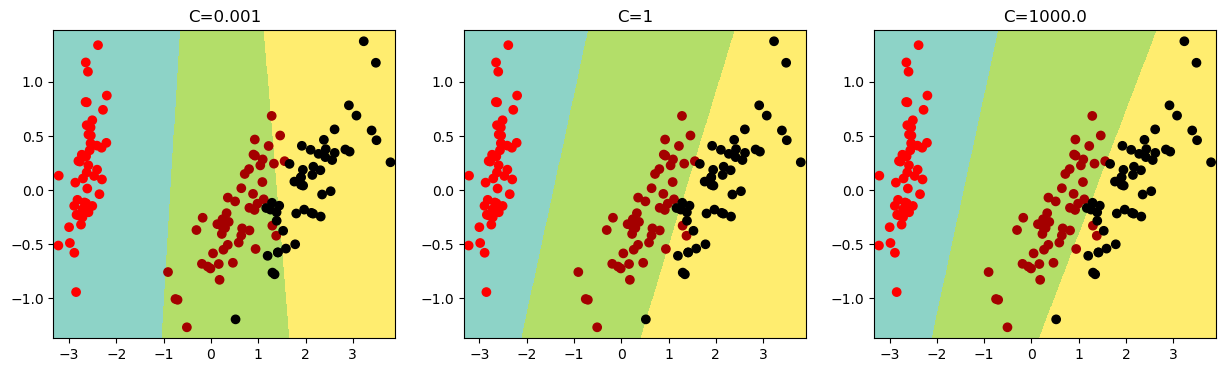

In [69]:
fig, axes = plt.subplots(1,3,figsize=(15,4))

C_values =  [1e-3,1,1e3]

for i , C in enumerate(C_values):
    clf = SVC(kernel='linear', C=C)
    
    clf.fit(pca_features,labels)
    
    plot_hyplane(clf,pca_features,labels,i+1)
    
    plt.title(f'C={C}')
    
plt.show()

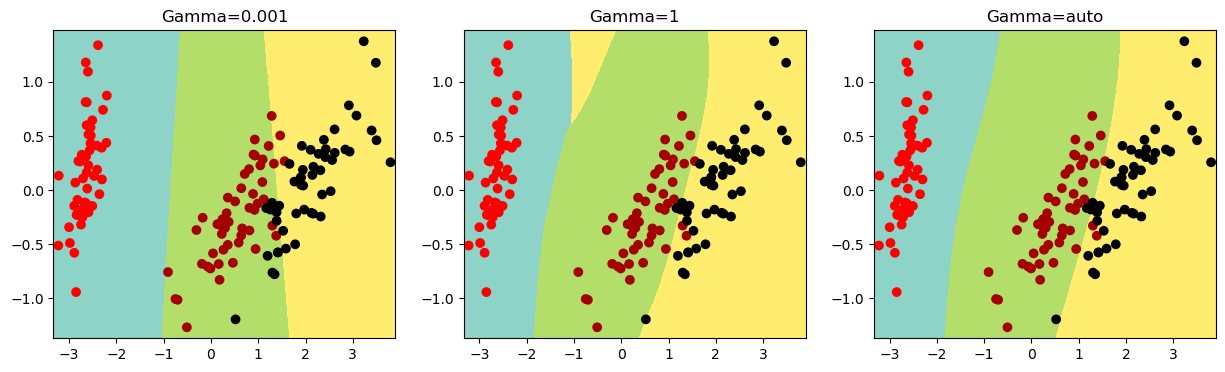

In [70]:
fig, axes = plt.subplots(1,3,figsize=(15,4))
gammas = [0.001,1,'auto']
for i, gm in enumerate(gammas):
    clf = SVC(kernel='rbf',gamma=gm)
    clf.fit(pca_features,labels)
    plot_hyplane(clf,pca_features,labels,i+1)
    plt.title(f'Gamma={gm}')
plt.show()